<a href="https://colab.research.google.com/github/anitakumar/ml/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [46]:
df =pd.read_csv('heart.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [48]:
# prompt: df.describe()

df.describe()


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


see if there is a relationship between age and cholestrol


Text(0.5, 1.0, 'age vs cholestrol')

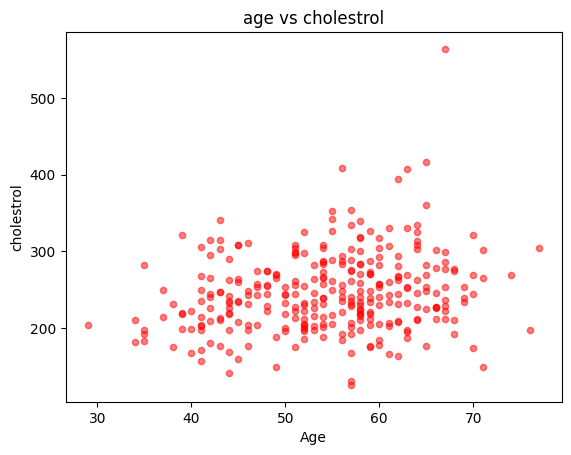

In [49]:
#scatter plot form cholestrol vs age using plt
df.plot(kind='scatter', x='Age', y='Chol',alpha=0.5, color='red')
plt.xlabel('Age')
plt.ylabel('cholestrol')
plt.title('age vs cholestrol')

In [44]:
# prompt: GET CATEGOTRIAL vars and convert to dummy

import pandas as pd
categorical_features = df.select_dtypes(include=['object']).columns

df_new = pd.get_dummies(df, columns=['ChestPain','Thal'], drop_first=True)


In [50]:
df_new.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,No,False,False,True,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3,Yes,False,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2,2,Yes,False,False,False,False,True
3,37,1,130,250,0,0,187,0,3.5,3,0,No,True,False,False,True,False
4,41,0,130,204,0,2,172,0,1.4,1,0,No,False,True,False,True,False


In [51]:
X=df_new.drop('AHD',axis=1)
y=df_new.AHD

In [53]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [57]:
#apply gridsearchCV
from sklearn.svm import SVC as svm
from sklearn.model_selection import GridSearchCV
ml = svm.SVC()
para_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid=GridSearchCV(ml,para_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

AttributeError: type object 'SVC' has no attribute 'SVC'

In [58]:
#apply gridsearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
ml = SVC() # Changed svm.SVC() to SVC()
para_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid=GridSearchCV(ml,para_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.0001)


In [61]:
accuracy=grid.best_score_
accuracy

0.7478741496598639

In [62]:
y_test_hat= grid.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_hat)

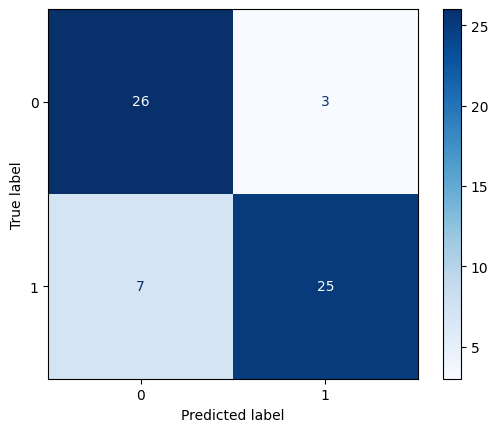

In [67]:
# Import the necessary library
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#display confusion matrix
disp=confusion_matrix(y_test,y_test_hat)

# Use ConfusionMatrixDisplay to create the plot
disp = ConfusionMatrixDisplay(confusion_matrix=disp)

# Plot the confusion matrix
disp.plot(include_values=True, cmap='Blues')
plt.show()

In [68]:
# prompt: classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_hat))


              precision    recall  f1-score   support

          No       0.79      0.90      0.84        29
         Yes       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

